## Libs and Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import seaborn as sns

## Entry Data

In [2]:
sub_data = pd.read_csv('data/Test.csv')
df = pd.read_csv('data/Train.csv')

## Exploratory Analysis

In [3]:
df.tail()

,Nome,Best_Resolution,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,DisplayPort_Connection,HDMI_Connection,Integrated,L2_Cache,...,Power_Connector,Process,ROPs,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection,DirectX
3175,6XQ6USO2OKE37VAB91G0JHQM8BDY,1366 x 768,1000 MHz,300 MHz,NaN,No,NaN,NaN,Yes,512KB,...,NaN,14nm,8,4096x2304,No,5.0,16.0,16 GTexel/s,NaN,12
3176,I27LCL2RJZDWZ9XB9QJU7SOUBOR5O235,1440 x 900,NaN,775 MHz,1.0,Yes,NaN,1.0,No,256KB,...,None,40nm,8,2560x1600,Yes,5.0,20.0,16 GTexel/s,1.0,11
3177,UINAFY25UJYCMETQEJC97T2KXUFH89AP,1680 x 1050,NaN,820 MHz,1.0,Yes,NaN,1.0,No,512KB,...,None,40nm,32,2560x1600,Yes,5.0,48.0,39 GTexel/s,0.0,11
3178,9SDMOEXS4208SB7D24OMUDUXH5M6RO4GL8UR4L063A9,NaN,NaN,850 MHz,2.0,Yes,NaN,1.0,No,512KB,...,None,28nm,16,4096x2160,Yes,5.0,32.0,27 GTexel/s,1.0,12
3179,WYT6CKKXSI3SX8N37VSOPX7,3840 x 2160,1582 MHz,1480 MHz,2.0,Yes,3.0,1.0,No,1536KB(x2),...,1x 6-pin + 1x 8-pin,16nm,48 (x2),7680x3200,Yes,5.0,112.0,354 GTexel/s,0.0,12


In [13]:
df.Process.unique()

array(['28nm', nan, '14nm', '16nm', '40nm', '22nm', '55nm', '65nm',
       '80nm', '90nm', '32nm', '110nm', '130nm', '150nm', '100nm'],
      dtype=object)

In [4]:
df.shape

(3180, 29)

In [5]:
df.dtypes.head(28)

Nome                       object
Best_Resolution            object
Boost_Clock                object
Core_Speed                 object
DVI_Connection            float64
Dedicated                  object
DisplayPort_Connection    float64
HDMI_Connection           float64
Integrated                 object
L2_Cache                   object
Max_Power                  object
Memory                     object
Memory_Bandwidth           object
Memory_Bus                 object
Memory_Speed               object
Memory_Type                object
Notebook_GPU               object
PSU                        object
Pixel_Rate                 object
Power_Connector            object
Process                    object
ROPs                       object
Resolution_WxH             object
SLI_Crossfire              object
Shader                    float64
TMUs                      float64
Texture_Rate               object
VGA_Connection            float64
dtype: object

In [6]:
df.describe()

,DVI_Connection,DisplayPort_Connection,HDMI_Connection,Shader,TMUs,VGA_Connection,DirectX
count,2501.000000,836.000000,2492.000000,3098.000000,2739.000000,2494.000000,3180.000000
mean,1.368653,1.616029,0.864366,4.744061,70.230376,0.212109,11.420755
std,0.707701,1.221438,0.466525,0.644150,54.450249,0.428991,0.964130
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000
25%,1.000000,1.000000,1.000000,5.000000,32.000000,0.000000,11.000000
50%,1.000000,1.000000,1.000000,5.000000,56.000000,0.000000,12.000000
75%,2.000000,3.000000,1.000000,5.000000,112.000000,0.000000,12.000000
max,4.000000,4.000000,3.000000,5.000000,384.000000,4.000000,12.000000


In [7]:
df.isna().sum().head(28) # Direct X (target) has no NaN values

Nome                         0
Best_Resolution            530
Boost_Clock               1768
Core_Speed                   0
DVI_Connection             679
Dedicated                   10
DisplayPort_Connection    2344
HDMI_Connection            688
Integrated                  10
L2_Cache                     0
Max_Power                  547
Memory                     366
Memory_Bandwidth           101
Memory_Bus                  47
Memory_Speed                91
Memory_Type                 43
Notebook_GPU                 0
PSU                       1051
Pixel_Rate                 445
Power_Connector            646
Process                    374
ROPs                       441
Resolution_WxH             150
SLI_Crossfire                0
Shader                      82
TMUs                       441
Texture_Rate               445
VGA_Connection             686
dtype: int64

In [8]:
df.select_dtypes(include=[object]).notna().astype(str) # converts every object dtype column to string type

,Nome,Best_Resolution,Boost_Clock,Core_Speed,Dedicated,Integrated,L2_Cache,Max_Power,Memory,Memory_Bandwidth,...,Memory_Type,Notebook_GPU,PSU,Pixel_Rate,Power_Connector,Process,ROPs,Resolution_WxH,SLI_Crossfire,Texture_Rate
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,False,False,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,True,True,False
2,True,True,False,True,True,True,True,True,True,True,...,True,True,False,True,False,True,True,True,True,True
3,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,False,True,True,True,True,True,True,True,...,True,True,False,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,True,True,True,True,True,True,True,True,False,True,...,True,True,False,True,False,True,True,True,True,True
3176,True,True,False,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
3177,True,True,False,True,True,True,True,False,True,True,...,True,True,False,True,True,True,True,True,True,True
3178,True,False,False,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [9]:
df.iloc[:,:10].head(3)

,Nome,Best_Resolution,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,DisplayPort_Connection,HDMI_Connection,Integrated,L2_Cache
0,GDVGF0SH61PY9M2INL2QI3AHTK3HTCKI7VHE7O19,1920 x 1080,1253 MHz,1076 MHz,1.0,Yes,1.0,1.0,No,1024KB
1,7JK45GGO3YLWSYL,NaN,NaN,\n-,NaN,Yes,NaN,NaN,No,0KB
2,ZC0GAMPBZGI7HE1,1366 x 768,NaN,810 MHz,NaN,Yes,NaN,NaN,No,256KB


In [10]:
df.iloc[:,10:].head(3)

,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Memory_Type,Notebook_GPU,PSU,Pixel_Rate,Power_Connector,Process,ROPs,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection,DirectX
0,75 Watts,2048 MB,105.8GB/sec,128 Bit,1653 MHz,GDDR5,No,350 Watt & 23 Amps,40 GPixel/s,None,28nm,32,5120x3200,Yes,5.0,48.0,60 GTexel/s,0.0,12
1,50 Watts,512 MB,25.6GB/sec,128 Bit,800 MHz,GDDR3,Yes,NaN,NaN,NaN,NaN,NaN,2560x1600,No,4.0,NaN,NaN,NaN,10
2,45 Watts,2048 MB,28.8GB/sec,128 Bit,900 MHz,DDR3,Yes,NaN,13 GPixel/s,NaN,28nm,16,4096x2160,No,5.0,32.0,26 GTexel/s,NaN,12


In [322]:
df.columns

Index(['Nome', 'Best_Resolution', 'Boost_Clock', 'Core_Speed',
       'DVI_Connection', 'Dedicated', 'DisplayPort_Connection',
       'HDMI_Connection', 'Integrated', 'L2_Cache', 'Max_Power', 'Memory',
       'Memory_Bandwidth', 'Memory_Bus', 'Memory_Speed', 'Memory_Type',
       'Notebook_GPU', 'PSU', 'Pixel_Rate', 'Power_Connector', 'Process',
       'ROPs', 'Resolution_WxH', 'SLI_Crossfire', 'Shader', 'TMUs',
       'Texture_Rate', 'VGA_Connection', 'DirectX'],
      dtype='object')

### For each column we'll have a different treatment, the ___`Nome`___ column is a sort o `primary_key`, so we'll not work with it;

In [323]:
# df.drop(columns=['Nome'],inplace=True)

##### `Best_Resolution`

In [324]:
df.Best_Resolution

0       1920 x 1080
1               NaN
2        1366 x 768
3       1920 x 1080
4        1366 x 768
           ...     
3175     1366 x 768
3176     1440 x 900
3177    1680 x 1050
3178            NaN
3179    3840 x 2160
Name: Best_Resolution, Length: 3180, dtype: object

In [325]:
Best_Resolution2 = df.Best_Resolution.str.split(r'\sx\s', expand=True)
Best_Resolution2.rename(columns={0: 'Best_Resolution_Width', 1: 'Best_Resolution_Height'},inplace=True)
Best_Resolution2.head()

,Best_Resolution_Width,Best_Resolution_Height
0,1920,1080
1,NaN,NaN
2,1366,768
3,1920,1080
4,1366,768


<AxesSubplot:xlabel='Best_Resolution_Width', ylabel='Best_Resolution_Height'>

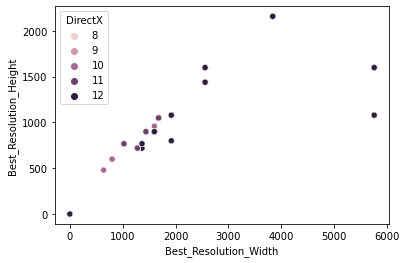

In [341]:
Best_Resolution2.fillna(0,inplace=True)
Best_Resolution2 = Best_Resolution2.astype(int)
# Best_Resolution2.dtypes
new_df = pd.concat([df,Best_Resolution2],axis=1)

sns.scatterplot(data=new_df, x='Best_Resolution_Width', y='Best_Resolution_Height', hue=new_df.DirectX)

##### `Boost_Clock`

In [327]:
df.Boost_Clock

0       1253 MHz 
1             NaN
2             NaN
3       1111 MHz 
4             NaN
          ...    
3175    1000 MHz 
3176          NaN
3177          NaN
3178          NaN
3179    1582 MHz 
Name: Boost_Clock, Length: 3180, dtype: object

In [328]:
df.Boost_Clock.str.split(r'(MHz\s)$',expand=True)[1].unique() #checking alternative units to MHz in the column
# df.Boost_Clock.str.extract(r'\b([a-zA-Z][^\s]*)')

array(['MHz ', nan], dtype=object)

In [329]:
Boost_Clock2 = df.Boost_Clock.str.extract(r'^(\d+)')
Boost_Clock2.rename(columns={0 : 'Boost_Clock_values'},inplace=True)
Boost_Clock2 # = Boost_Clock2.astype(int)

Boost_Clock2_notNaN = Boost_Clock2[Boost_Clock2.Boost_Clock_values.notna()].astype(int)
Boost_Clock2_notNaN.describe()

,Boost_Clock_values
count,1412.000000
mean,1205.971671
std,253.409405
min,400.000000
25%,1050.000000
50%,1176.000000
75%,1317.000000
max,1936.000000


In [330]:
Boost_Clock2.fillna(0,inplace=True) # int(Boost_Clock2_notNaN.mean())
Boost_Clock2.astype(int)
# Boost_Clock2.dtypes

new_df = pd.concat([new_df,Boost_Clock2],axis=1)
new_df.head()

,Nome,Best_Resolution,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,DisplayPort_Connection,HDMI_Connection,Integrated,L2_Cache,...,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection,DirectX,Best_Resolution_Width,Best_Resolution_Height,Boost_Clock_values
0,GDVGF0SH61PY9M2INL2QI3AHTK3HTCKI7VHE7O19,1920 x 1080,1253 MHz,1076 MHz,1.0,Yes,1.0,1.0,No,1024KB,...,5120x3200,Yes,5.0,48.0,60 GTexel/s,0.0,12,1920,1080,1253
1,7JK45GGO3YLWSYL,NaN,NaN,\n-,NaN,Yes,NaN,NaN,No,0KB,...,2560x1600,No,4.0,NaN,NaN,NaN,10,0,0,0
2,ZC0GAMPBZGI7HE1,1366 x 768,NaN,810 MHz,NaN,Yes,NaN,NaN,No,256KB,...,4096x2160,No,5.0,32.0,26 GTexel/s,NaN,12,1366,768,0
3,TOASMLBKENKUKMXGHHQ1CN95QZRZB2GF7G35KJMOC,1920 x 1080,1111 MHz,1046 MHz,1.0,Yes,NaN,2.0,No,384KB,...,4096x2160,Yes,5.0,80.0,89 GTexel/s,0.0,12,1920,1080,1111
4,G1C3DNBKSFIJ1QH9,1366 x 768,NaN,954 MHz,NaN,Yes,NaN,NaN,No,128KB,...,4096x2160,No,5.0,32.0,31 GTexel/s,NaN,12,1366,768,0


##### `Core_Speed`

In [12]:
df.HDMI_Connection.unique()

array([ 1., nan,  2.,  0.,  3.])

In [11]:
df.HDMI_Connection.value_counts()

1.0    1934
0.0     453
2.0      95
3.0      10
Name: HDMI_Connection, dtype: int64

In [25]:
df.PSU

0       350 Watt & 23 Amps
1                      NaN
2                      NaN
3       450 Watt & 24 Amps
4                      NaN
               ...        
3175                   NaN
3176              400 Watt
3177                   NaN
3178              400 Watt
3179    600 Watt & 42 Amps
Name: PSU, Length: 3180, dtype: object

In [36]:
df.PSU.str.split(r"&",expand=True)[1]

0        23 Amps
1            NaN
2            NaN
3        24 Amps
4            NaN
          ...   
3175         NaN
3176        None
3177         NaN
3178        None
3179     42 Amps
Name: 1, Length: 3180, dtype: object

In [119]:
df.Memory_Type.unique()

array(['GDDR5', 'GDDR3', 'DDR3', 'DDR4', 'GDDR5X', 'DDR2', nan, 'GDDR4',
       'DDR', 'GDDR2', 'HBM-1', 'HBM-2', 'eDRAM'], dtype=object)

In [107]:
df.Texture_Rate

0        60 GTexel/s
1                NaN
2        26 GTexel/s
3        89 GTexel/s
4        31 GTexel/s
            ...     
3175     16 GTexel/s
3176     16 GTexel/s
3177     39 GTexel/s
3178     27 GTexel/s
3179    354 GTexel/s
Name: Texture_Rate, Length: 3180, dtype: object

In [112]:
df.Texture_Rate.str.split(expand=True)

0        60
1       NaN
2        26
3        89
4        31
       ... 
3175     16
3176     16
3177     39
3178     27
3179    354
Name: 0, Length: 3180, dtype: object

In [55]:
df.Boost_Clock.str.extract(r'^(\d+)')

,0
0,1253
1,NaN
2,NaN
3,1111
4,NaN
...,...
3175,1000
3176,NaN
3177,NaN
3178,NaN


In [79]:
df.L2_Cache

0           1024KB
1              0KB
2            256KB
3            384KB
4            128KB
           ...    
3175         512KB
3176         256KB
3177         512KB
3178         512KB
3179    1536KB(x2)
Name: L2_Cache, Length: 3180, dtype: object

In [86]:
df.L2_Cache.str.split(r'^(\d+)', expand=True)[2].unique()

array(['KB', 'KB(x2)', 'KB(x4)', 'KB(x3)'], dtype=object)

In [44]:
df.Resolution_WxH[df.Resolution_WxH.notna()]

0       5120x3200
1       2560x1600
2       4096x2160
3       4096x2160
4       4096x2160
          ...    
3175    4096x2304
3176    2560x1600
3177    2560x1600
3178    4096x2160
3179    7680x3200
Name: Resolution_WxH, Length: 3030, dtype: object

In [93]:
df.Resolution_WxH.str.split(r'x',expand=True)

,0,1
0,5120,3200
1,2560,1600
2,4096,2160
3,4096,2160
4,4096,2160
...,...,...
3175,4096,2304
3176,2560,1600
3177,2560,1600
3178,4096,2160


In [46]:
df.Resolution_WxH[df.Resolution_WxH.notna()].str.extract(r'^(\d+)')

,0
0,5120
1,2560
2,4096
3,4096
4,4096
...,...
3175,4096
3176,2560
3177,2560
3178,4096


In [45]:
df.Resolution_WxH[df.Resolution_WxH.notna()].str.extract(r'(\d+)$')

,0
0,3200
1,1600
2,2160
3,2160
4,2160
...,...
3175,2304
3176,1600
3177,1600
3178,2160


In [39]:
df.Process[df.Process.notna()].str.extract(r'(\d+)').value_counts()

28     1449
40      581
14      302
16      200
55       95
65       54
80       39
22       35
32       23
90       13
150       7
110       4
130       3
100       1
dtype: int64

In [36]:
df.Process[df.Process.notna()].str.extract(r'(nm)$')

,0
0,nm
2,nm
3,nm
4,nm
5,nm
...,...
3175,nm
3176,nm
3177,nm
3178,nm


In [ ]:
df.L2_Cache.value_counts()

In [ ]:
%%time

pairplot = sns.pairplot(df)
plt.show()

### Rascunho e observações

Dropout e Batch Normalization 

In [ ]:
# # values = df.Boost_Clock[df.Boost_Clock.notna()].apply(lambda x: str(x))
# # type(values.values[2])

# def anti_filter(column,partial_str):
#     """
#     This function only filter values from `column` that
#     do not contain values from `partial_str`
#     """

#     values = column[column.notna()].apply(lambda x: str(x)).values

#     return [x for x in values if all(y in x for y in partial_str)] # not --> is optional

# not_MHz_values = anti_filter(df.L2_Cache, ['(x'])

# print("Boost_Clock not MHz values:", not_MHz_values)7

# from collections import Counter

# def select_ocurrence(list,sep,occurrence):
#     """
#     sep : character of occurrence in a string
#     ocurrence : 0 for pre-occurrence, 2 for post-occurrence
#     """

#     list = [str(x) for x in list]

#     return [x.partition(sep)[occurrence][1] for x in list] 



# spo_list = select_ocurrence(not_MHz_values,'(', 2)

# pd.DataFrame(Counter(spo_list),index=[0]) 


mudando pela media da idade baseada na pclass e sex

In [ ]:
for sex, pclass in [(sex, pclass) for sex in train.Sex.unique() for pclass in train.Pclass.unique()]:
    condition = (train.Sex == sex) & (train.Pclass == pclass)
    age_mean = train.loc[condition, "Age"].mean()
    train.loc[condition & train.Age.isnull(), "Age"] = age_mean